# Logistic Regression

# Assignment 2

In [126]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython import display
from pandas.tools.plotting import scatter_matrix
import scipy as sp

In [127]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

First, we'll read in the exam data:

In [291]:
data = pd.read_csv('Exercises_2/ex2/ex2data1.txt', header=None, names=['Exam1', 'Exam2', 'Admitted'])

Let's add in $x_0$ to make the dot product of $X$ and $\theta$ possible: ($X \cdot \theta$)

In [292]:
data.insert(0, 'x0', value=np.ones([len(data),1]))

In [293]:
data.head()

,x0,Exam1,Exam2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


Let's plot the data, labelleling which students were / were not admitted.

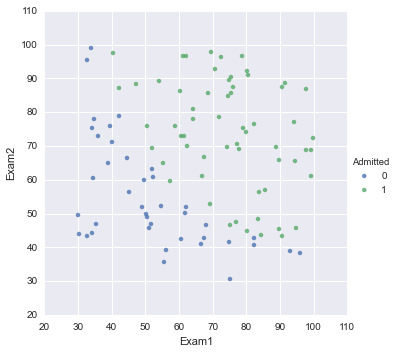

In [294]:
sns.lmplot(x='Exam1', y='Exam2', data=data, hue='Admitted', fit_reg=False);

Seaborn is great and we can redo that plot with regression fits for our differently labelled data. This emphasizes the spearation between the two sets of data (although it will not often be this obvious). 

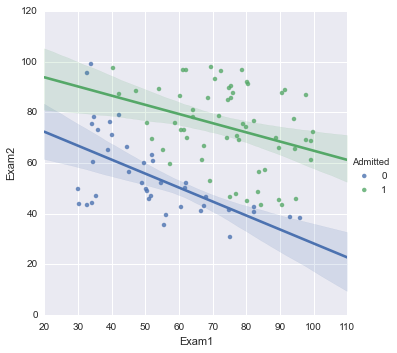

In [295]:
sns.lmplot(x='Exam1', y='Exam2', data=data, hue='Admitted', fit_reg=True);

Now let's define the sigmoid function $g(z) = \frac{1}{1+e^{-z}}$ so we can use it in our hypothesis.

In [296]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Let's plot the sigmoid function to visualize the fact that when $H(x) > 0$, $y \rightarrow 1$, whereas when $H(x) < 0$, $y \rightarrow 0$.

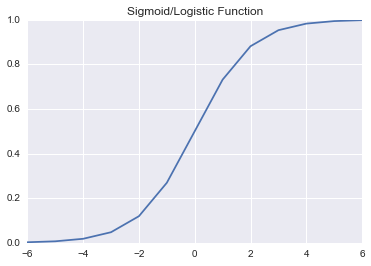

In [297]:
x = [i for i in xrange(-6, 7)]
y = [sigmoid(i) for i in xrange(-6,7)]
plt.title('Sigmoid/Logistic Function')
plt.plot(x,y);

To ensure our function is working, we'll test it with a few values. Larger values should asymptote to 1 whereas smaller values should approach 0.  As shown above, $g(0) = 0.5$

In [298]:
print 'Sigmoid  0: %s' % sigmoid(0) 
print 'Sigmoid  1: %.2f' % sigmoid(1)
print 'Sigmoid -1: %.2f' % sigmoid(-1)
print 'Sigmoid 10: %.5f' % sigmoid(10)

Sigmoid  0: 0.5
Sigmoid  1: 0.73
Sigmoid -1: 0.27
Sigmoid 10: 0.99995


Our code even works with matrices and vectors!

In [303]:
a = np.array([[0,1], [-1,10]])
print a
print 
print sigmoid(a)

[[ 0  1]
 [-1 10]]

[[ 0.5         0.73105858]
 [ 0.26894142  0.9999546 ]]


Now we'll implement the Cost Function for Logistic Regression:
$$ J(\theta) = -\frac{1}{m} \big( log(g(X\theta))^T \cdot \vec{y} + log(1-g(X\theta))^T\cdot(1-\vec{y})\big) $$

In [304]:
def cost_function(theta, X, Y):
    g_xo = sigmoid(np.dot(X, theta))
    p1 = np.dot(np.log(g_xo).T, Y)
    p2 = np.dot(np.log(1-g_xo).T, (1-Y))
    return float((-1.0/(len(X))) * (p1 + p2))

A. Ng says we should get a value of .693 if we were starting with a $\theta$ initialized at zero.

In [305]:
X = np.array(data.drop('Admitted', 1))
Y = np.array([data['Admitted']]).T
theta = np.array([[0,0,0]]).T
print 'Cost_Fn should return 0.693, and we get: %.3f' % cost_function(theta, X, Y)

Cost_Fn should return 0.693, and we get: 0.693


Now we'll optimize our parameters ($\theta$) by utilizing a minimization algorithm.

In [306]:
sp.optimize.minimize(cost_function, theta, args=(X, Y), method = 'Nelder-Mead')

  status: 0
    nfev: 287
 success: True
     fun: 0.20349770159021519
       x: array([-25.16130062,   0.20623142,   0.20147143])
 message: 'Optimization terminated successfully.'
     nit: 157

Now that we've optimized for our $\theta$ parameters, we can draw the boundary line. This is not as intuitive as it may appear since we now have 3 values for both $\theta$ and $X$. We know that when $\theta\cdot X = 0$, the sigmoid function returns $0.5$, which defines our boundary line.  So: 

$0 = -25.16(x_0) + 0.206(x_1) + 0.201(x_2)$.  Since we want to solve for a line, we'll solve for $x_2$.

$$x_2 = \frac{-25.16x_0 + 0.206x_1}{0.201}$$

$$x_2 = \frac{-25.16}{0.201} + \frac{0.206}{0.201}x_1$$

$$x_2 = mx + b = -1.025x_1 + 125.17$$

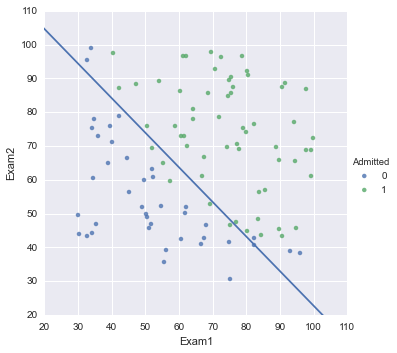

In [309]:
y = [x*-1.025 + 125.17 for x in xrange(110)]
x = [x for x in xrange(110)]
g = sns.lmplot(x='Exam1', y='Exam2', data=data, hue='Admitted', fit_reg=False)
plt.xlim([20,110])
plt.ylim([20,110])
plt.plot(x,y);

A. Ng says the probability of a student being admitted with an Exam1 of 45 and an Exam2 of 85 is 0.776. 

$H(x) = g(\theta\cdot X) = sigmoid(\theta\cdot X)$

In [246]:
print 'Student should have a 78% chance of passing. We get {}'.format(sigmoid(-25.1613 + 45*.20623 + 85*.20147))

Student should have a 78% chance of passing. We get 0.776259504629


In [288]:
def predict(X, Y, theta):
    guesses = 0
    for i in xrange(len(X)):
        row = np.array([X[i]])
        if sigmoid(np.dot(row, theta)) >= 0.5:
            if Y[i] == 1:
                guesses += 1
        else:
            if Y[i] == 0:
                guesses += 1
    return guesses*1.0 / len(X)

In [308]:
theta = np.array([[-25.1613, .20623, .20147]]).T # From optimization
print 'Our ability to predict admittance is: {}%'.format(predict(X, Y, theta)*100)

Our ability to predict admittance is: 89.0%
